# Work with the UTA GTFS files

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString
import os

%matplotlib inline

In [3]:
gtfs_dir = 'utah-transit-authority_20160331_1817'
routes = pd.read_csv(os.path.join(gtfs_dir, 'routes.txt'))
shapes = pd.read_csv(os.path.join(gtfs_dir, 'shapes.txt'))
trips = pd.read_csv(os.path.join(gtfs_dir, 'trips.txt'))
stops = pd.read_csv(os.path.join(gtfs_dir, 'stops.txt'))
stop_times = pd.read_csv(os.path.join(gtfs_dir, 'stop_times.txt'), dtype={'stop_id': object})
calendar = pd.read_csv(os.path.join(gtfs_dir, 'calendar.txt'))

# There are some weird stop_ids in stop_times

In [4]:
len(stop_times)

1515685

In [5]:
bad_stop_ids = stop_times['stop_id'].apply(lambda x: (not str(x).isnumeric()))

In [6]:
bad_stops = stop_times[bad_stop_ids]
len(bad_stops)

526

In [7]:
bad_stops.head(5)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
1046,2743168,16:53:00,16:53:00,22184_merged_2787228,1,NaN,NaN,NaN,NaN,NaN
1068,2743169,08:53:00,08:53:00,22184_merged_2787228,1,NaN,NaN,NaN,NaN,NaN
1138,2743166,14:53:00,14:53:00,22184_merged_2787228,1,NaN,NaN,NaN,NaN,NaN
1160,2743167,15:53:00,15:53:00,22184_merged_2787228,1,NaN,NaN,NaN,NaN,NaN
2756,2541878,07:56:00,07:56:00,22184_merged_2787227,3,NaN,NaN,NaN,NaN,NaN


# Look at all the files

In [8]:
routes.head(5)

,route_long_name,route_type,route_text_color,route_color,agency_id,route_id,route_url,route_desc,route_short_name
0,HIGHLAND DRIVE FAST BUS,3,FFFFFF,3333CC,NaN,60988,NaN,NaN,320
1,3300 SOUTH,3,FFFFFF,3333CC,NaN,60989,NaN,NaN,33
2,4000 WEST/ DIXIE VALLEY,3,FFFFFF,3333CC,NaN,60982,NaN,NaN,240
3,4800 WEST,3,FFFFFF,3333CC,NaN,60983,NaN,NaN,248
4,FOOTHILL BLVD / 2700 EAST,3,FFFFFF,3333CC,NaN,60980,NaN,NaN,228


In [9]:
shapes.head(3)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,133799,40.390900,-111.577479,1,0.0000
1,133799,40.390810,-111.577240,2,0.0226
2,133799,40.390729,-111.577080,3,0.0388


In [10]:
trips.head(3)

,block_id,route_id,direction_id,trip_headsign,shape_id,service_id,trip_id
0,b_889894,63307,1,West Valley Central Station,139215,4_merged_2787276,2729438
1,b_889894,63307,1,West Valley Central Station,139215,4_merged_2787276,2729439
2,a_861365,60989,0,Millcreek Station,132480,3_merged_2787242,2510053


In [12]:
stop_times.head(3)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,2729438,10:13:00,10:13:00,23259,1,NaN,NaN,NaN,NaN,NaN
1,2729438,10:13:30,10:13:30,22847,2,NaN,NaN,NaN,NaN,NaN
2,2729438,10:14:16,10:14:16,22831,3,NaN,NaN,NaN,NaN,NaN


In [13]:
calendar.head(3)

,service_id,start_date,end_date,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,23_merged_2787238,20151206,20160409,0,0,0,0,0,0,0
1,13_merged_2787231,20151206,20160409,0,0,0,0,0,0,0
2,150804_merged_2787241,20151206,20160409,0,0,0,0,0,0,0


In [14]:
shapes.head(3)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,133799,40.390900,-111.577479,1,0.0000
1,133799,40.390810,-111.577240,2,0.0226
2,133799,40.390729,-111.577080,3,0.0388


# Transform gtfs shapes to lines

In [26]:
shapes['coords'] = tuple(zip(shapes['shape_pt_lon'], shapes['shape_pt_lat']))

In [27]:
shapes = shapes.sort_values(by=['shape_id', 'shape_pt_sequence'])

In [28]:
shapes.head(3)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled,coords
92322,132426,40.763180,-111.90910,1,0.0000,"(-111.9091, 40.76318)"
92323,132426,40.763250,-111.90904,2,0.0093,"(-111.90903999999999, 40.76325)"
92324,132426,40.764009,-111.90894,3,0.0130,"(-111.90893999999999, 40.764009)"


In [37]:
line_lists = shapes.groupby('shape_id').agg({'shape_id': 'first', 'shape_dist_traveled': 'sum', 'coords': lambda c: (c.tolist())})

In [38]:
line_lists.head()

,shape_id,shape_dist_traveled,coords
shape_id,,,
132426,132426,1360.3743,"[(-111.9091, 40.76318), (-111.90903999999999, ..."
132427,132427,1397.7476,"[(-111.83755, 40.772409), (-111.837799, 40.772..."
132428,132428,1175.5721,"[(-111.89701000000001, 40.7247), (-111.89702, ..."
132429,132429,868.5537,"[(-111.83948000000001, 40.77047), (-111.83898,..."
132430,132430,644.1306,"[(-111.9091, 40.76318), (-111.90903999999999, ..."


In [41]:
line_lists['coords'] = line_lists['coords'].apply(LineString)

In [42]:
gtfs_shapes = gpd.GeoDataFrame(line_lists, geometry='coords')
gtfs_shapes.crs = {'init' :'epsg:4326'}
gtfs_shapes.head()

,shape_id,shape_dist_traveled,coords
shape_id,,,
132426,132426,1360.3743,"LINESTRING (-111.9091 40.76318, -111.90904 40...."
132427,132427,1397.7476,"LINESTRING (-111.83755 40.772409, -111.837799 ..."
132428,132428,1175.5721,"LINESTRING (-111.89701 40.7247, -111.89702 40...."
132429,132429,868.5537,"LINESTRING (-111.83948 40.77047, -111.83898 40..."
132430,132430,644.1306,"LINESTRING (-111.9091 40.76318, -111.90904 40...."


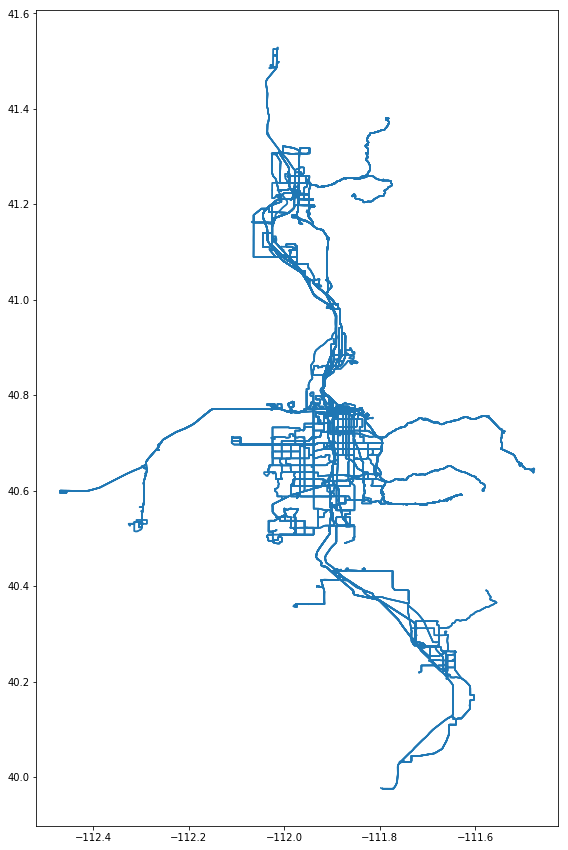

In [47]:
gtfs_shapes.plot(figsize=(25,15))

In [44]:
gtfs_shapes.to_file('gtfs_shapes.shp')

C:\Users\kwalker\AppData\Local\ESRI\conda\envs\geofun\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
